In [2]:
# # # # # # # # # # # # #
# Phys1321 Final Project -- December 2018
# 
#    Nolan Ardolino
#    Adam Grusky
#    David Dimond
#
#     
#    Belousov–Zhabotinsky reactions
#

In [18]:
# imports

import cv2
import time as timer
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

In [19]:
# This block calculates and animates the effect of diffusion on stability

# prepare a plot
fig1 = plt.figure(figsize=(5,8))
line1, = plt.plot([])
line2, = plt.plot([])
plt.xlabel('[Species 1]')
plt.ylabel('[Species 2]')
plt.title('Effects of Diffusion on Oscillation Stability')
plt.xlim(0, 2)
plt.ylim(0, 2.5)

du, dv = 1, 1 
eps, q, f = 0.2, 10e-3, 1.0 # Du controls the convergence of the reaction. It is the diffusion constant

# these are the Oregonator equations 
def oregonator(r,t):
    u, v = r
    fu = (1/eps)*(u*(1-u) - ((u-q)/(u+q))*f*v + Du*du**2)
    fv = u - v + Du*dv**2
    return fu, fv
    
init = [0, 0] # initial values for odeint
t = np.linspace(0, 20, 10000)

Du_array = np.linspace(10e-6, 2, 100) # list of values used for the diffusion constant
u_concentration, v_concentration = [], []
for i in range(len(Du_array)):
    Du = Du_array[i]
    A = odeint(oregonator, init, t)
    x, y = A.T
    u_concentration.append(x) # append sweeps to lists
    v_concentration.append(y)
    
def animate(frame):
    line1.set_data([u_concentration[frame], v_concentration[frame]]) # animate [u] vs. [v] plot

anim = FuncAnimation(fig1, animate, frames=len(Du_array), interval=30)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

In [20]:
# This block calculates and animates damped oscillations of the Oregonator

# prepare a plot
fig2 = plt.figure(figsize=(8,4))
line2, = plt.plot([])
line3, = plt.plot([])
plt.xlabel('Time')
plt.ylabel('[Relative Concentration]')
plt.title('Damped Oscillations with Decreased Diffusivity')
plt.xlim(0, 10)
plt.ylim(0, 3)

du, dv = 1, 1
eps, q, f = 0.2, 10e-3, 1.0 # Du controls the convergence of the reaction. It is a diffusion constant

def oregonator(r,t):
    u, v = r
    fu = (1/eps)*(u*(1-u) - ((u-q)/(u+q))*f*v + Du*du**2)
    fv = u - v + Du*dv**2
    return fu, fv
    
init = [0, 0] # initial values for odeint
t = np.linspace(0, 10, 10000)
Du_array = np.linspace(10e-6, 2, 1000) # list of values used for the diffusion constant
u_concentration, v_concentration = [], []
for i in range(len(Du_array)):
    Du = Du_array[i]
    A = odeint(oregonator, init, t)
    x, y = A.T
    u_concentration.append(x)
    v_concentration.append(y)

def animate(frame):
    line2.set_data([t, u_concentration[frame]])
    line3.set_data([t, v_concentration[frame]])

anim = FuncAnimation(fig2, animate, frames=len(Du_array), interval=20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

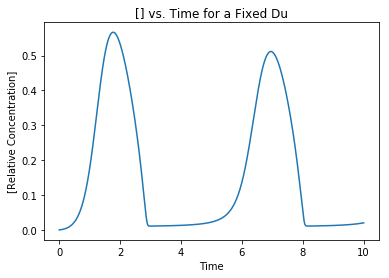

[============================================================] 630/629

In [21]:
# This block calculates and animates a concentration spiral

Du_sweep = 1
plt.xlabel('Time')
plt.ylabel('[Relative Concentration]')
plt.title('[] vs. Time for a Fixed Du')
plt.plot(t, u_concentration[Du_sweep])
plt.show()
A = []
C1 = u_concentration[Du_sweep].copy() # use the concentration curve of species u for a fixed value of Du
C = C1[::60] # down sample to lighten computational load
dim = len(C)
timesteps = int(dim/2) # make the number of time steps equal to 1/2 the length of C
max_val = max(C) # used to normalize values between 0 and 255
time = np.linspace(0, timesteps, timesteps+1) # used to help find a reasonable step size for phi (see for loop in line 17)
im = np.zeros((dim, dim)) # creates the blank image on which to draw the spiral
book = [] # list for keeping all of the rotated images together

for i in time: 
    phi = i/(max(time))*2*np.pi # calculate by how much to rotate the 'phaser' along which C is overlayed
    B = np.roll(C, -1, axis=0) # after rotating the 'phaser', roll the C array so that the peaks in C are shifted along the radius by 1 step
    A.append(B.copy())
    C = B    
    for j in time:
        x_comp = round(j*np.cos(phi-np.pi)) # calculate the x and y coordinates cooresponding to each pixel along the new radius
        y_comp = round(j*np.sin(phi-np.pi))
        im[round(dim/2)-1+int(x_comp), round(dim/2)-1+int(y_comp)] = C[int(j)]/max_val*255 # scale the values between 0 and 255

kernel = np.ones((8,8),np.float32)/64
im = cv2.filter2D(im,-1,kernel) # apply averaging filter to remove lines caused by bigger steps 0 to 360  
        
rows, cols = im.shape
for angle in np.arange(0, 2*np.pi, .01): # rotate the spiral through 360 degrees and append each image to book
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1) # calculate the affine matrix
    im = (cv2.warpAffine(im,M,(cols,rows))) # apply affine transform
    book.append(im)

fig = plt.figure(figsize=(8,8))
plt.xlim(-10,10)
plt.ylim(-10,10)
line = plt.imshow([[]], extent=(-10,10,-10,10))

def animate(frame):
    line.set_data(book[frame]) 
    progress.progress += 1

progress = display.ProgressBar(len(book))
progress.display()
anim = FuncAnimation(fig, animate, frames=len(book), interval=20)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

In [22]:
#
#
#      Only one of the next two blocks needs run
#
#

In [23]:
# To load image place image file in same directory as notebook and add to dictionary below

#Images = {"PIT":"pittscript.jpeg","TREE":"tree.png", "CAT":"cat.jpg", "EXP":"exp.png"}

#img = Image.open(Images["PIT"])

#width, height = img.size
#img = np.array(img)

#img = img[:,:,1]/255

In [24]:
# To draw image run this cell and follow these instructions:
#     Left click to draw circles
#     Press escaped when finished

width, height = 800,800 # larger values will take longer to animate
circle_size = [40,30,20] # keep in mind the PDEs use a 3x3 grid. Sizes smaller than 15 die out quickly
circle_size_index = 0

background_color_value = 1 
circle_color = 255

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global circle_size_index
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),circle_size[circle_size_index],circle_color, -1)
        circle_size_index = (circle_size_index + 1) % len(circle_size)
        
# make initial image and create windows/events
img = np.ones((height,width,3), np.uint8)*background_color_value
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

# turn image to array
img = Image.fromarray(img)
width, height = img.size
img = np.array(img)
img = img[:,:,1]

In [25]:
# This block initializes the concentration arrays

# plot img if desired
#plt.imshow(img)
#plt.show()

# get image dimensions
M, N = img.shape

# initialize concentation arrays
A = np.ones((M,N), dtype=float)*img
B = np.ones((M,N), dtype=float)*img
C = np.ones((M,N), dtype=float)*img
A0 = A.copy()
B0 = B.copy()
C0 = C.copy()

T = np.array([A,B,C])

In [26]:
# This block defines the timestep function used during the animation

# rate constants
a, b, c = .7, 1, 1

def timestep(T):
    
    # copy current concentration arrays (old = current)
    A0 = T[0].copy()
    B0 = T[1].copy()
    C0 = T[2].copy()
    
    # perform jacobi iterations for each chemical
    for T0 in (A0,B0,C0):
        left = np.roll(T0, 1, axis=1)
        right = np.roll(T0, -1, axis=1)
        below = np.roll(T0, -1, axis=0)
        above = np.roll(T0, 1, axis=0)
        
        #T0[1:-1, 1:-1] = 0.25*(left[1:-1, 1:-1] + right[1:-1, 1:-1] +
        #                  above[1:-1, 1:-1] + below[1:-1, 1:-1])
        
        # alternatively use a Moore neighborhood (all 9 pts in 3x3 stencil) for better looking high-res animations
        above_left = np.roll(above, 1, axis=1)
        above_right = np.roll(above,-1, axis=1)
        below_left = np.roll(below, 1, axis=1)
        below_right = np.roll(below, -1, axis=1)
                              
        T0[1:-1, 1:-1] = (1/9)*(left[1:-1, 1:-1] + right[1:-1, 1:-1] +
                          above[1:-1, 1:-1] + below[1:-1, 1:-1] +
                          above_left[1:-1, 1:-1] + above_right[1:-1, 1:-1] +
                          below_left[1:-1, 1:-1] + below_right[1:-1, 1:-1] + T0[1:-1, 1:-1])
        
        # The following keeps the PDE from reflecting at the boundaries.
        #T0[0] = T0[1]
        #T0[-1] = T0[-2]
        #T0[:,0] = T0[:,1]
        #T0[:,-1] = T0[:,-2]

    
    # A0, B0, C0 have been jacobi averaged
    
    # reaction PDEs
    T[0] = A0 + A0*(a*B0 - c*C0) 
    T[1] = B0 + B0*(b*C0 - a*A0)
    T[2] = C0 + C0*(c*A0 - b*B0)

    
    # make sure concentrations are between 0 and 100%
    T[:][T<0] = 0
    T[:][T>1] = 1

    return T

In [27]:
# This block creates the animation by calling the timestep() function above

# modify number of frames to change length of video
frames = 500

# create figure
fig = plt.figure(figsize=(width/100, height/100))
im = plt.imshow(T[0], cmap="bone", animated=True) # other nice looking cmaps inculde bone, greys, cool.
plt.axis("off")                                   #   More can be found at 
                                                  # https://matplotlib.org/examples/color/colormaps_reference.html

# optionally plot the colorbar, the animation looks better without it
#plt.colorbar()     
    
# get start time if interested in timing
start = timer.time()

# define animation function
def animate(i, T):
    T = timestep(T)
    im.set_array(T[0]) # could use T[1] and T[2]
    progress.progress += 1
    return im

# create progress bar
progress = display.ProgressBar(frames)
progress.display()

# process first several timesteps to avoid sharp changes in contrast at beginning of video
for _ in range(30):
    timestep(T)
    progress.progress += 1

# create animation
anim = FuncAnimation(fig, animate, frames=frames, interval=40, fargs=(T,), repeat=False)
plt.close()

###### - This block displays in notebook
#
video = anim.to_html5_video()
stop = timer.time()
print("calculation time:", stop-start, "s")
display.HTML(video)
#
######

###### - This block saves video -- large file sizes will need to be saved
# 
#save_string = time.strftime("%Y%m%d-%H%M%S") + ".mp4"
#anim.save(save_string, fps=30, dpi=120, savefig_kwargs={'facecolor':'black'})
#print("saved as: ", save_string)
#stop = timer.time()
#print("calculation time:", stop-start, "s")
#
######

[===============================================================] 531/500

calculation time: 44.81302618980408 s
